### Load Spark

In [3]:
import os
import sys

spark_home = os.getenv('SPARK_HOME', None)
if not spark_home:
    raise ValueError('SPARK_HOME environment variable is not set')
sys.path.insert(0, os.path.join(spark_home, 'python'))
sys.path.insert(0, os.path.join(spark_home, 'python/lib/py4j-0.8.1-src.zip'))
execfile(os.path.join(spark_home, 'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.5.2
      /_/

Using Python version 2.7.10 (default, Oct 19 2015 18:04:42)
SparkContext available as sc, HiveContext available as sqlContext.


In [4]:
def categorical_to_numeric(dataframe):
    for i in range(len(dataframe.columns)):
        val = dataframe[i].values[0]
        if (isinstance(val, str) and not val.isdigit()):
            column = dataframe[i].values
            unique_values = np.unique(column)
            mapper = {value: index for (index, value) in enumerate(unique_values)}

            dataframe.replace({i: mapper}, inplace=True)
    return dataframe

### ** Read and parse the initial dataset **

#### ** Load and check the data **
#### The raw data is currently stored in a CSV.  We will start by storing this raw data in as an RDD, with each element of the RDD representing a data point as a comma-delimited string. Each string starts with the label (a year) followed by numerical audio features. Use the [count method](https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.count) to check how many data points we have.  Then use the [take method](https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.take) to create and print out a list of the first 5 data points in their initial string format.

In [50]:
# load libraries
from pyspark.mllib.regression import LabeledPoint
import numpy as np
import pandas as pd
from test_helper import Test

# from pyspark import SparkContext
# sc = SparkContext()

filepath = "/home/castamere/code/independent/outputs/truncated.csv"
# filepath = "/home/castamere/code/independent/outputs/hive_results.csv"

numPartitions = 2

# rawData = sc.textFile(filePath, numPartitions, del='\t')
print "Load complete."

Load complete.


In [51]:
column_names = ['person_id', 'timestamp', 'gender', 'birthyear', 'age', 'smoker_categ', 'smoker_detail', 'labtest_name', 'labtest_val', 'finding_name', 'finding_val', 'egfr']

df = pd.read_csv(filepath, delimiter="\t", header=None)
df.columns = column_names
print df.shape
print df

# df = rawData.toDF()
# df = sqlContext.createDataFrame(rawData)

(9999, 12)
      person_id   timestamp gender  birthyear  age   smoker_categ  \
0       8599033  2011-02-23      F       1936   78  SOC_NonSmoker   
1       8599033  2011-02-23      F       1936   78  SOC_NonSmoker   
2       8599033  2011-02-23      F       1936   78  SOC_NonSmoker   
3       8599033  2011-02-23      F       1936   78  SOC_NonSmoker   
4       8599033  2011-02-23      F       1936   78  SOC_NonSmoker   
5       8599033  2011-02-23      F       1936   78  SOC_NonSmoker   
6       8599033  2011-02-23      F       1936   78  SOC_NonSmoker   
7       8599033  2011-02-23      F       1936   78  SOC_NonSmoker   
8       8599033  2011-02-23      F       1936   78  SOC_NonSmoker   
9       8599033  2011-02-23      F       1936   78  SOC_NonSmoker   
10      8599033  2011-02-23      F       1936   78  SOC_NonSmoker   
11      8599033  2011-02-23      F       1936   78  SOC_NonSmoker   
12      8599033  2011-02-23      F       1936   78  SOC_NonSmoker   
13      8599033  2011-0

In [52]:
print set(df['smoker_categ'].values)
print set(df['smoker_detail'].values)
print set(df['labtest_name'].values)
print set(df['finding_name'].values)


set(['SOC_Smoker', 'SOC_PastSmoker', 'SOC_NonSmoker'])
set(['y', 'n'])
set(['LR_HDL', 'LR_MicroCr', 'LR_AST', 'LR_Trig', 'LR_PHOS', 'LR_CR', 'LR_GlucFast', 'LR_GlucNonFast', 'LR_LDL', 'LR_GFR', 'LR_ALT', 'LR_A1C', 'LR_GFR_AfrAmer'])
set(['FND_BPD', 'FND_BPS', 'FND_WTLB', 'FND_HTIN'])


In [ ]:

# Identify the categorical data columns and convert them to a numerical representation
df = categorical_to_numeric(df)

spark_df = sqlContext.createDataFrame(df)
rawData = spark_df.rdd


           0    1   2     3   4   5   6   7      8   9      10         11
0     8599033  285   0  1936  78   0   0   1   28.0   2   65.0  53.622462
1     8599033  285   0  1936  78   0   0   8   44.0   3  206.0  53.622462
2     8599033  285   0  1936  78   0   0   8   44.0   0   70.0  53.622462
3     8599033  285   0  1936  78   0   0   8   44.0   1  120.0  53.622462
4     8599033  285   0  1936  78   0   0   8   44.0   2   65.0  53.622462
5     8599033  285   0  1936  78   0   0   9   75.0   3  206.0  53.622462
6     8599033  285   0  1936  78   0   0   9   75.0   0   70.0  53.622462
7     8599033  285   0  1936  78   0   0   9   75.0   1  120.0  53.622462
8     8599033  285   0  1936  78   0   0   9   75.0   2   65.0  53.622462
9     8599033  285   0  1936  78   0   0   7  155.0   3  206.0  53.622462
10    8599033  285   0  1936  78   0   0   7  155.0   0   70.0  53.622462
11    8599033  285   0  1936  78   0   0   7  155.0   1  120.0  53.622462
12    8599033  285   0  1936  78   0  

In [8]:
# TODO: Replace <FILL IN> with appropriate code
numPoints = rawData.count()
print numPoints
samplePoints = rawData.take(5)
print samplePoints

9999
[Row(0=8599033, 1=285, 2=0, 3=1936, 4=78, 5=0, 6=0, 7=1, 8=28.0, 9=2, 10=65.0, 11=53.622461937473794), Row(0=8599033, 1=285, 2=0, 3=1936, 4=78, 5=0, 6=0, 7=8, 8=44.0, 9=3, 10=206.0, 11=53.622461937473794), Row(0=8599033, 1=285, 2=0, 3=1936, 4=78, 5=0, 6=0, 7=8, 8=44.0, 9=0, 10=70.0, 11=53.622461937473794), Row(0=8599033, 1=285, 2=0, 3=1936, 4=78, 5=0, 6=0, 7=8, 8=44.0, 9=1, 10=120.0, 11=53.622461937473794), Row(0=8599033, 1=285, 2=0, 3=1936, 4=78, 5=0, 6=0, 7=8, 8=44.0, 9=2, 10=65.0, 11=53.622461937473794)]


In [9]:
# TEST Load and check the data (1a)
Test.assertEquals(numPoints, 9999, 'incorrect value for numPoints')
Test.assertEquals(len(samplePoints), 5, 'incorrect length for samplePoints')

1 test passed.
1 test passed.


#### ** Using `LabeledPoint` **
#### In MLlib, labeled training instances are stored using the [LabeledPoint](https://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.regression.LabeledPoint) object.  Write the parsePoint function that takes as input a raw data point, parses it using Python's [unicode.split](https://docs.python.org/2/library/string.html#string.split) method, and returns a `LabeledPoint`.  Use this function to parse samplePoints (from the previous question).  Then print out the features and label for the first training point, using the `LabeledPoint.features` and `LabeledPoint.label` attributes. Finally, calculate the number features for this dataset.
#### Note that `split()` can be called directly on a `unicode` or `str` object.  For example, `u'split,me'.split(',')` returns `[u'split', u'me']`.

In [11]:
def parsePoint(line):
    parsed_line = line
#     parsed_line = line.split(',')
#     return LabeledPoint(parsed_line[0], parsed_line[1:])
    return LabeledPoint(parsed_line[-1], parsed_line[2:-1])

# Making a pipelined RDD
parsedSamplePoints = rawData.map(lambda x: parsePoint(x))

# First point
firstPointFeatures = parsedSamplePoints.first().features
firstPointLabel = parsedSamplePoints.first().label
print 'First point:', firstPointFeatures, firstPointLabel

d = len(firstPointFeatures)
print '# of features:', d

First point: [0.0,1936.0,78.0,0.0,0.0,1.0,28.0,2.0,65.0] 53.6224619375
# of features: 9


#### **Visualization 1: Features**
#### First we will load and setup the visualization library.  Then we will look at the raw features for 50 data points by generating a heatmap that visualizes each feature on a grey-scale and shows the variation of each feature across the 50 sample data points.  The features are all between 0 and 1, with values closer to 1 represented via darker shades of grey.

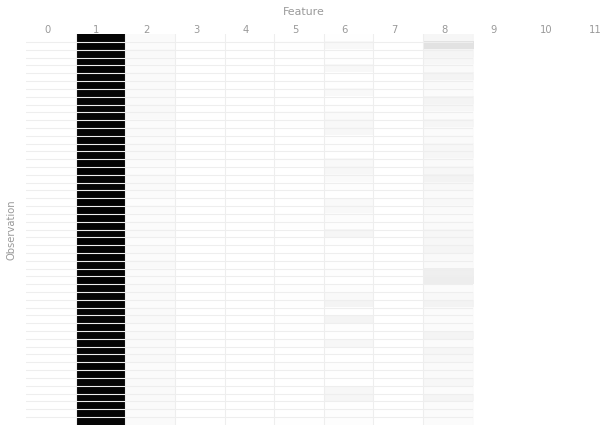

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# sampleMorePoints = rawData.take(50)
# You can uncomment the line below to see randomly selected features.  These will be randomly
# selected each time you run the cell.  Note that you should run this cell with the line commented
# out when answering the lab quiz questions.
sampleMorePoints = rawData.takeSample(False, 50)

parsedSampleMorePoints = map(parsePoint, sampleMorePoints)
dataValues = map(lambda lp: lp.features.toArray(), parsedSampleMorePoints)

def preparePlot(xticks, yticks, figsize=(10.5, 6), hideLabels=False, gridColor='#999999',
                gridWidth=1.0):
    """Template for generating the plot layout."""
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hideLabels: axis.set_ticklabels([])
    plt.grid(color=gridColor, linewidth=gridWidth, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

# generate layout and plot
fig, ax = preparePlot(np.arange(.5, 11, 1), np.arange(.5, 49, 1), figsize=(8,7), hideLabels=True,
                      gridColor='#eeeeee', gridWidth=1.1)
image = plt.imshow(dataValues,interpolation='nearest', aspect='auto', cmap=cm.Greys)
for x, y, s in zip(np.arange(-.125, 12, 1), np.repeat(-.75, 12), [str(x) for x in range(12)]):
    plt.text(x, y, s, color='#999999', size='10')
plt.text(4.7, -3, 'Feature', color='#999999', size='11'), ax.set_ylabel('Observation')
pass

#### ** Find the range **
#### Now let's examine the labels to find the range of song years.  To do this, first parse each element of the `rawData` RDD, and then find the smallest and largest labels.

In [14]:
parsedDataInit = rawData.map(lambda x: parsePoint(x))
onlyLabels = parsedDataInit.map(lambda x: x.label)
minGfr = onlyLabels.min()
maxGfr = onlyLabels.max()
print maxGfr, minGfr
gfrRange = maxGfr - minGfr
print 'gfr range:', gfrRange

116.537218133 19.9203425275
gfr range: 96.6168756056


#### **Shift labels **
#### As we just saw, the labels are years in the 1900s and 2000s.  In learning problems, it is often natural to shift labels such that they start from zero.  Starting with `parsedDataInit`, create a new RDD consisting of `LabeledPoint` objects in which the labels are shifted such that smallest label equals zero.

In [15]:

print '{0}'.format(parsedDataInit.take(1))
parsedData = parsedDataInit.map(lambda x: LabeledPoint((x.label - minGfr), x.features))

# Should be a LabeledPoint
# print type(parsedData.take(1)[0])
# View the first point
print '{0}'.format(parsedData.take(1))

[LabeledPoint(53.6224619375, [0.0,1936.0,78.0,0.0,0.0,1.0,28.0,2.0,65.0])]
[LabeledPoint(33.70211941, [0.0,1936.0,78.0,0.0,0.0,1.0,28.0,2.0,65.0])]


In [16]:
oldSampleFeatures = parsedDataInit.take(1)[0].features
newSampleFeatures = parsedData.take(1)[0].features
Test.assertTrue(np.allclose(oldSampleFeatures, newSampleFeatures),
                'new features do not match old features')
sumFeatTwo = parsedData.map(lambda lp: lp.features[2]).sum()
Test.assertTrue(np.allclose(sumFeatTwo, 3158.96224351), 'parsedData has unexpected values')
minYearNew = parsedData.map(lambda lp: lp.label).min()
maxYearNew = parsedData.map(lambda lp: lp.label).max()
print minYearNew, maxYearNew
Test.assertTrue(minYearNew == 0, 'incorrect min year in shifted data')
Test.assertTrue(maxYearNew == 89, 'incorrect max year in shifted data')

1 test passed.
1 test failed. parsedData has unexpected values
0.0 96.6168756056
1 test passed.
1 test failed. incorrect max year in shifted data


#### ** Visualization 2: Shifting labels **
#### We will look at the labels before and after shifting them.  Both scatter plots below visualize tuples storing i) a label value and ii) the number of training points with this label.  The first scatter plot uses the initial labels, while the second one uses the shifted labels.  Note that the two plots look the same except for the labels on the x-axis.

/home/castamere/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


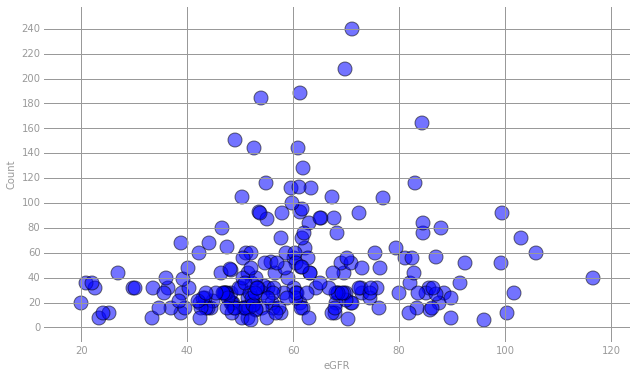

In [17]:
# get data for plot
oldData = (parsedDataInit
           .map(lambda lp: (lp.label, 1))
           .reduceByKey(lambda x, y: x + y)
           .collect())
x, y = zip(*oldData)

# generate layout and plot data
fig, ax = preparePlot(np.arange(0, 200, 20), np.arange(0, 300, 20))
plt.scatter(x, y, s=14**2, alpha=0.55)
ax.set_xlabel('eGFR'), ax.set_ylabel('Count')
pass

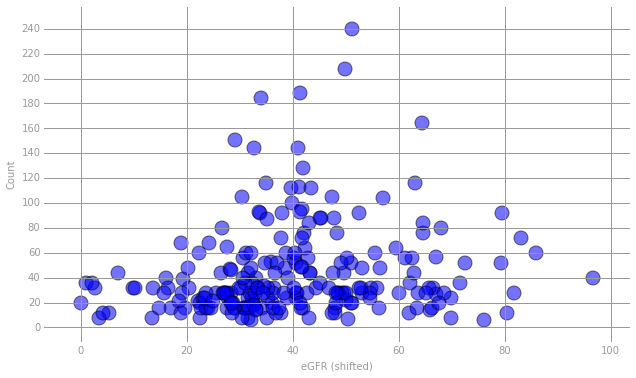

In [18]:
# get data for plot
newData = (parsedData
           .map(lambda lp: (lp.label, 1))
           .reduceByKey(lambda x, y: x + y)
           .collect())
x, y = zip(*newData)

# generate layout and plot data
fig, ax = preparePlot(np.arange(0, 200, 20), np.arange(0, 300, 20))
plt.scatter(x, y, s=14**2, alpha=0.55)
ax.set_xlabel('eGFR (shifted)'), ax.set_ylabel('Count')
pass

#### ** Training, validation, and test sets **
#### We're almost done parsing our dataset, and our final task involves split it into training, validation and test sets. Use the [randomSplit method](https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.randomSplit) with the specified weights and seed to create RDDs storing each of these datasets. Next, cache each of these RDDs, as we will be accessing them multiple times in the remainder of this lab. Finally, compute the size of each dataset and verify that the sum of their sizes equals the value computed in Part (1a).

In [19]:
# TODO: Replace <FILL IN> with appropriate code
weights = [.8, .1, .1]
seed = 42
parsedTrainData, parsedValData, parsedTestData = parsedData.randomSplit(weights, seed)
parsedTrainData.cache()
parsedValData.cache()
parsedTestData.cache()
nTrain = parsedTrainData.count()
nVal = parsedValData.count()
nTest = parsedTestData.count()

print nTrain, nVal, nTest, nTrain + nVal + nTest
print parsedData.count()

8052 984 963 9999
9999


### ** Create and evaluate a baseline model **

#### **Average label **
#### A very simple yet natural baseline model is one where we always make the same prediction independent of the given data point, using the average label in the training set as the constant prediction value.  Compute this value, which is the average (shifted) song year for the training set.  Use an appropriate method in the [RDD API](https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD).

In [20]:
averageTrainGfr = (parsedTrainData
                    .map(lambda x: x.label).reduce(lambda a, b: a + b)) / nTrain
print averageTrainGfr

42.2852824237


#### **Root mean squared error **
#### We naturally would like to see how well this naive baseline performs.  We will use root mean squared error ([RMSE](http://en.wikipedia.org/wiki/Root-mean-square_deviation)) for evaluation purposes.  Implement a function to compute RMSE given an RDD of (label, prediction) tuples, and test out this function on an example.

In [21]:
# TODO: Replace <FILL IN> with appropriate code
def squaredError(label, prediction):
    return (label - prediction) ** 2

def calcRMSE(labelsAndPreds):
    return ((labelsAndPreds
            .map(lambda x: squaredError(x[0], x[1]))
            .reduce(lambda a, b: a + b)) / labelsAndPreds.count()) ** 0.5

# RMSE test
labelsAndPreds = sc.parallelize([(3., 1.), (1., 2.), (2., 2.)])
# RMSE = sqrt[((3-1)^2 + (1-2)^2 + (2-2)^2) / 3] = 1.291
exampleRMSE = calcRMSE(labelsAndPreds)
print exampleRMSE

1.29099444874


#### **Training, validation and test RMSE **
#### Now let's calculate the training, validation and test RMSE of our baseline model. To do this, first create RDDs of (label, prediction) tuples for each dataset, and then call calcRMSE. Note that each RMSE can be interpreted as the average prediction error for the given dataset (in terms of number of years).

In [22]:
labelsAndPredsTrain = parsedTrainData.map(lambda x : (x.label, averageTrainGfr))
rmseTrainBase = calcRMSE(labelsAndPredsTrain)

labelsAndPredsVal = parsedValData.map(lambda x : (x.label, averageTrainGfr))
rmseValBase = calcRMSE(labelsAndPredsVal)

labelsAndPredsTest = parsedTestData.map(lambda x : (x.label, averageTrainGfr))
rmseTestBase = calcRMSE(labelsAndPredsTest)

print 'Baseline Train RMSE = {0:.3f}'.format(rmseTrainBase)
print 'Baseline Validation RMSE = {0:.3f}'.format(rmseValBase)
print 'Baseline Test RMSE = {0:.3f}'.format(rmseTestBase)

Baseline Train RMSE = 15.791
Baseline Validation RMSE = 15.907
Baseline Test RMSE = 16.696


#### ** Predicted vs. actual **
#### We will visualize predictions on the validation dataset. The scatter plots below visualize tuples storing i) the predicted value and ii) true label.  The first scatter plot represents the ideal situation where the predicted value exactly equals the true label, while the second plot uses the baseline predictor (i.e., `averageTrainYear`) for all predicted values.  Further note that the points in the scatter plots are color-coded, ranging from light yellow when the true and predicted values are equal to bright red when they drastically differ.

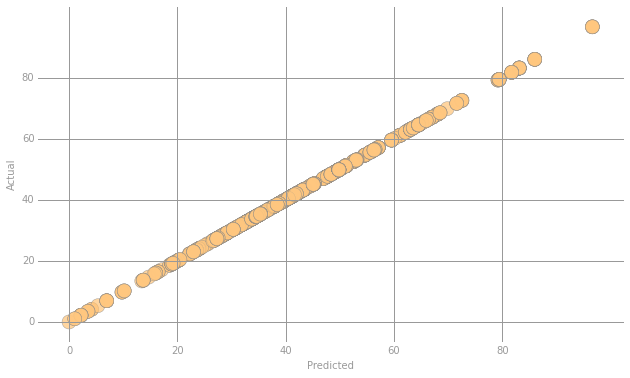

In [23]:
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.cm import get_cmap
cmap = get_cmap('copper_r')
norm = Normalize()

actual = np.asarray(parsedValData
                    .map(lambda lp: lp.label)
                    .collect())
error = np.asarray(parsedValData
                   .map(lambda lp: (lp.label, lp.label))
                   .map(lambda (l, p): squaredError(l, p))
                   .collect())
clrs = cmap(np.asarray(norm(error)))[:,0:3]

fig, ax = preparePlot(np.arange(0, 100, 20), np.arange(0, 100, 20))
plt.scatter(actual, actual, s=14**2, c=clrs, edgecolors='#888888', alpha=0.75, linewidths=0.5)
ax.set_xlabel('Predicted'), ax.set_ylabel('Actual')
pass

(<matplotlib.text.Text at 0x7ffa6aa2da50>,
 <matplotlib.text.Text at 0x7ffa6aa56510>)

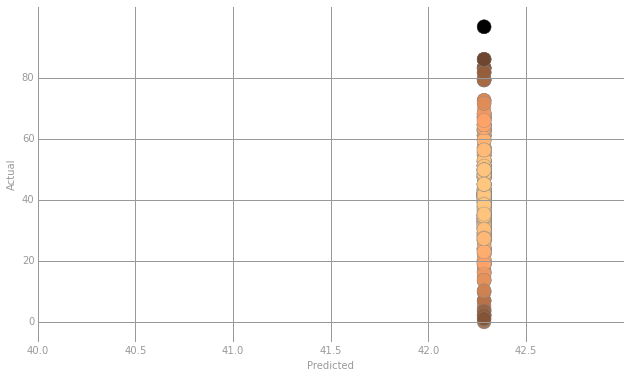

In [24]:
predictions = np.asarray(parsedValData
                         .map(lambda lp: averageTrainGfr)
                         .collect())
error = np.asarray(parsedValData
                   .map(lambda lp: (lp.label, averageTrainGfr))
                   .map(lambda (l, p): squaredError(l, p))
                   .collect())
norm = Normalize()
clrs = cmap(np.asarray(norm(error)))[:,0:3]

fig, ax = preparePlot(np.arange(40.0, 43.0, 0.5), np.arange(0, 100, 20))
ax.set_xlim(40, 43)
plt.scatter(predictions, actual, s=14**2, c=clrs, edgecolors='#888888', alpha=0.75, linewidths=0.3)
ax.set_xlabel('Predicted'), ax.set_ylabel('Actual')

### ** Train using MLlib and perform grid search **

#### **`LinearRegressionWithSGD` **
#### We're already doing better than the baseline model, but let's see if we can do better by adding an intercept, using regularization, and (based on the previous visualization) training for more iterations.  MLlib's [LinearRegressionWithSGD](https://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.regression.LinearRegressionWithSGD) essentially implements the same algorithm that we implemented in Part (3b), albeit more efficiently and with various additional functionality, such as stochastic gradient approximation, including an intercept in the model and also allowing L1 or L2 regularization.  First use LinearRegressionWithSGD to train a model with L2 regularization and with an intercept.  This method returns a [LinearRegressionModel](https://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.regression.LinearRegressionModel).  Next, use the model's [weights](http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.regression.LinearRegressionModel.weights) and [intercept](http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.regression.LinearRegressionModel.intercept) attributes to print out the model's parameters.

In [ ]:
from pyspark.mllib.regression import LinearRegressionWithSGD
from pyspark.mllib.regression import LinearRegressionModel

# Weights are all negative.
# And negative prediction

In [ ]:
x = parsedTrainData.collect()
print len(x)

In [ ]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(maxIter=50, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(parsedTrainData.toDF())

# Print the weights and intercept for linear regression
print("Weights: " + str(lrModel.weights))
print("Intercept: " + str(lrModel.intercept))

In [ ]:
# Values to use when training the linear regression model
numIters = 50  # iterations
alpha = 0.2  # step
miniBatchFrac = 1.0  # miniBatchFraction
reg = 1e-1  # regParam
regType = 'l2'  # regType
useIntercept = True  # intercept

# Train
firstModel = LinearRegressionWithSGD.train(parsedTrainData, iterations=numIters, step=alpha, miniBatchFraction=miniBatchFrac, initialWeights=None, regParam=reg, regType=regType, intercept=useIntercept)

# weightsLR1 stores the model weights; interceptLR1 stores the model intercept
weightsLR1 = firstModel.weights
interceptLR1 = firstModel.intercept
print weightsLR1, interceptLR1

In [ ]:
# TEST LinearRegressionWithSGD (4a)
expectedIntercept = 13.3335907631
expectedWeights = [16.682292427, 14.7439059559, -0.0935105608897, 6.22080088829, 4.01454261926, -3.30214858535,
                   11.0403027232, 2.67190962854, 7.18925791279, 4.46093254586, 8.14950409475, 2.75135810882]
Test.assertTrue(np.allclose(interceptLR1, expectedIntercept), 'incorrect value for interceptLR1')
Test.assertTrue(np.allclose(weightsLR1, expectedWeights), 'incorrect value for weightsLR1')

#### **(4b) Predict**
#### Now use the [LinearRegressionModel.predict()](http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.regression.LinearRegressionModel.predict) method to make a prediction on a sample point.  Pass the `features` from a `LabeledPoint` into the `predict()` method.

In [ ]:
# TODO: Replace <FILL IN> with appropriate code
samplePoint = parsedTrainData.take(1)[0]
samplePrediction = firstModel.predict(samplePoint.features)
# samplePrediction = weightsLR1.dot(samplePoint.features) + interceptLR1
print samplePrediction

In [ ]:
# TEST Predict (4b)
Test.assertTrue(np.allclose(samplePrediction, 56.8013380112),
                'incorrect value for samplePrediction')

#### ** (4c) Evaluate RMSE **
#### Next evaluate the accuracy of this model on the validation set.  Use the `predict()` method to create a `labelsAndPreds` RDD, and then use the `calcRMSE()` function from Part (2b).

In [ ]:
# TODO: Replace <FILL IN> with appropriate code
labelsAndPreds = parsedValData.map(lambda x : (x.label, firstModel.predict(x.features)))
rmseValLR1 = calcRMSE(labelsAndPreds)

print ('Validation RMSE:\n\tBaseline = {0:.3f}\n\tLR0 = {1:.3f}' +
       '\n\tLR1 = {2:.3f}').format(rmseValBase, rmseValLR0, rmseValLR1)

In [ ]:
# Ground truth labels v/s predictions
print labelsAndPreds.collect()[:10]

In [ ]:
# TEST Evaluate RMSE (4c)
Test.assertTrue(np.allclose(rmseValLR1, 19.691247), 'incorrect value for rmseValLR1')

#### ** (4d) Grid search **
#### We're already outperforming the baseline on the validation set by almost 2 years on average, but let's see if we can do better. Perform grid search to find a good regularization parameter.  Try `regParam` values `1e-10`, `1e-5`, and `1`.

In [ ]:
# TODO: Replace <FILL IN> with appropriate code
bestRMSE = rmseValLR1
bestRegParam = reg
bestModel = firstModel

numIters = 500
alpha = 1.0
miniBatchFrac = 1.0
for reg in [1e-10, 1e-5, 1]:
    model = LinearRegressionWithSGD.train(parsedTrainData, numIters, alpha,
                                          miniBatchFrac, regParam=reg,
                                          regType='l2', intercept=True)
    labelsAndPreds = parsedValData.map(lambda lp: (lp.label, model.predict(lp.features)))
    rmseValGrid = calcRMSE(labelsAndPreds)
    print rmseValGrid

    if rmseValGrid < bestRMSE:
        bestRMSE = rmseValGrid
        bestRegParam = reg
        bestModel = model
rmseValLRGrid = bestRMSE

print ('Validation RMSE:\n\tBaseline = {0:.3f}\n\tLR0 = {1:.3f}\n\tLR1 = {2:.3f}\n' +
       '\tLRGrid = {3:.3f}').format(rmseValBase, rmseValLR0, rmseValLR1, rmseValLRGrid)

In [ ]:
# TEST Grid search (4d)
Test.assertTrue(np.allclose(17.017170, rmseValLRGrid), 'incorrect value for rmseValLRGrid')

#### ** Visualization 5: Best model's predictions**
#### Next, we create a visualization similar to 'Visualization 3: Predicted vs. actual' from Part 2 using the predictions from the best model from Part (4d) on the validation dataset.  Specifically, we create a color-coded scatter plot visualizing tuples storing i) the predicted value from this model and ii) true label.

In [ ]:
predictions = np.asarray(parsedValData
                         .map(lambda lp: bestModel.predict(lp.features))
                         .collect())
actual = np.asarray(parsedValData
                    .map(lambda lp: lp.label)
                    .collect())
error = np.asarray(parsedValData
                   .map(lambda lp: (lp.label, bestModel.predict(lp.features)))
                   .map(lambda (l, p): squaredError(l, p))
                   .collect())

norm = Normalize()
clrs = cmap(np.asarray(norm(error)))[:,0:3]

fig, ax = preparePlot(np.arange(0, 120, 20), np.arange(0, 120, 20))
ax.set_xlim(15, 82), ax.set_ylim(-5, 105)
plt.scatter(predictions, actual, s=14**2, c=clrs, edgecolors='#888888', alpha=0.75, linewidths=.5)
ax.set_xlabel('Predicted'), ax.set_ylabel(r'Actual')
pass

#### ** (4e) Vary alpha and the number of iterations **
#### In the previous grid search, we set `alpha = 1` for all experiments.  Now let's see what happens when we vary `alpha`.  Specifically, try `1e-5` and `10` as values for `alpha` and also try training models for 500 iterations (as before) but also for 5 iterations. Evaluate all models on the validation set.  Note that if we set `alpha` too small the gradient descent will require a huge number of steps to converge to the solution, and if we use too large of an `alpha` it can cause numerical problems, like you'll see below for `alpha = 10`.

In [ ]:
# TODO: Replace <FILL IN> with appropriate code
reg = bestRegParam
modelRMSEs = []

for alpha in [1e-5, 10]:
    for numIters in [5, 500]:
        model = LinearRegressionWithSGD.train(parsedTrainData, numIters, alpha,
                                              miniBatchFrac, regParam=reg,
                                              regType='l2', intercept=True)
        labelsAndPreds = parsedValData.map(lambda lp: (lp.label, model.predict(lp.features)))
        rmseVal = calcRMSE(labelsAndPreds)
        print 'alpha = {0:.0e}, numIters = {1}, RMSE = {2:.3f}'.format(alpha, numIters, rmseVal)
        modelRMSEs.append(rmseVal)

In [ ]:
# TEST Vary alpha and the number of iterations (4e)
expectedResults = sorted([56.969705, 56.892949, 355124752.221221])
Test.assertTrue(np.allclose(sorted(modelRMSEs)[:3], expectedResults), 'incorrect value for modelRMSEs')

#### **Hyperparameter heat map **
#### Next, we perform a visualization of hyperparameter search using a larger set of hyperparameters (with precomputed results).  Specifically, we create a heat map where the brighter colors correspond to lower RMSE values.  The first plot has a large area with brighter colors.  In order to differentiate within the bright region, we generate a second plot corresponding to the hyperparameters found within that region.

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Saved parameters and results, to save the time required to run 36 models
numItersParams = [10, 50, 100, 250, 500, 1000]
regParams = [1e-8, 1e-6, 1e-4, 1e-2, 1e-1, 1]
rmseVal = np.array([[  20.36769649,   20.36770128,   20.36818057,   20.41795354,  21.09778437,  301.54258421],
                    [  19.04948826,   19.0495    ,   19.05067418,   19.16517726,  19.97967727,   23.80077467],
                    [  18.40149024,   18.40150998,   18.40348326,   18.59457491,  19.82155716,   23.80077467],
                    [  17.5609346 ,   17.56096749,   17.56425511,   17.88442127,  19.71577117,   23.80077467],
                    [  17.0171705 ,   17.01721288,   17.02145207,   17.44510574,  19.69124734,   23.80077467],
                    [  16.58074813,   16.58079874,   16.58586512,   17.11466904,  19.6860931 ,   23.80077467]])

numRows, numCols = len(numItersParams), len(regParams)
rmseVal = np.array(rmseVal)
rmseVal.shape = (numRows, numCols)

fig, ax = preparePlot(np.arange(0, numCols, 1), np.arange(0, numRows, 1), figsize=(8, 7), hideLabels=True,
                      gridWidth=0.)
ax.set_xticklabels(regParams), ax.set_yticklabels(numItersParams)
ax.set_xlabel('Regularization Parameter'), ax.set_ylabel('Number of Iterations')

colors = LinearSegmentedColormap.from_list('blue', ['#0022ff', '#000055'], gamma=.2)
image = plt.imshow(rmseVal,interpolation='nearest', aspect='auto',
                    cmap = colors)

In [ ]:
# Zoom into the bottom left
numItersParamsZoom, regParamsZoom = numItersParams[-3:], regParams[:4]
rmseValZoom = rmseVal[-3:, :4]

numRows, numCols = len(numItersParamsZoom), len(regParamsZoom)

fig, ax = preparePlot(np.arange(0, numCols, 1), np.arange(0, numRows, 1), figsize=(8, 7), hideLabels=True,
                      gridWidth=0.)
ax.set_xticklabels(regParamsZoom), ax.set_yticklabels(numItersParamsZoom)
ax.set_xlabel('Regularization Parameter'), ax.set_ylabel('Number of Iterations')

colors = LinearSegmentedColormap.from_list('blue', ['#0022ff', '#000055'], gamma=.2)
image = plt.imshow(rmseValZoom,interpolation='nearest', aspect='auto',
                    cmap = colors)
pass

#### ** Evaluate interaction model on test data **
#### Our final step is to evaluate the new model on the test dataset.  Note that we haven't used the test set to evaluate any of our models.  Because of this, our evaluation provides us with an unbiased estimate for how our model will perform on new data.  If we had changed our model based on viewing its performance on the test set, our estimate of RMSE would likely be overly optimistic.
#### We'll also print the RMSE for both the baseline model and our new model.  With this information, we can see how much better our model performs than the baseline model.

In [ ]:
labelsAndPredsTest = testDataInteract.map(lambda lp: (lp.label, modelInteract.predict(lp.features)))
rmseTestInteract = calcRMSE(labelsAndPredsTest)

print ('Test RMSE:\n\tBaseline = {0:.3f}\n\tLRInteract = {1:.3f}'
       .format(rmseTestBase, rmseTestInteract))